In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# file imports
file_path = '../data/processed/forecasts_pmafe.csv'

# Import marius_eda data
df = pd.read_csv(file_path)

In [12]:
df.head()

,ibes_ticker_pk,official_ticker,cname,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_horizon,afe_analyst_i,afe_analyst_i_avg,afe_mean_firm_j,pmafe,announce_year
0,0000,TLMR,TALMER BANCORP,2500,72481,0.85,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,0.17,0.198000,0.166786,0.187152,2015
1,0000,TLMR,TALMER BANCORP,149,119962,0.86,2015-12-31,2015-02-18,2015-02-18,1.02,2016-01-26,316 days,0.16,0.174286,0.166786,0.044968,2015
2,0000,TLMR,TALMER BANCORP,1267,71182,0.89,2015-12-31,2015-04-30,2015-02-18,1.02,2016-01-26,316 days,0.13,0.158000,0.166786,-0.052677,2015
3,0000,TLMR,TALMER BANCORP,149,119962,0.89,2015-12-31,2015-04-30,2015-02-23,1.02,2016-01-26,311 days,0.13,0.174286,0.166786,0.044968,2015
4,0000,TLMR,TALMER BANCORP,873,79092,0.91,2015-12-31,2015-07-06,2015-04-07,1.02,2016-01-26,268 days,0.11,0.136667,0.166786,-0.180585,2015


# EDA

## Broker size

In [5]:
# count of distinct estimator (broker)
estimators = df['estimator'].nunique()
estimators

671

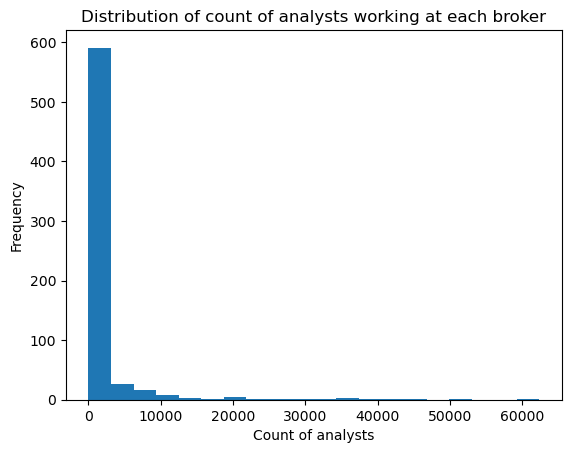

count      668.000000
mean      2034.679641
std       6814.167087
min          1.000000
25%         16.000000
50%         92.500000
75%        691.250000
max      62352.000000
Name: count, dtype: float64

In [24]:
# distribution of count of analysts working at each broker
df['estimator'].value_counts().plot(kind='hist', bins=20)
plt.title('Distribution of count of analysts working at each broker')
plt.xlabel('Count of analysts')
plt.ylabel('Frequency')
plt.show()

df['estimator'].value_counts().describe()

In [38]:
# count of brokers (estimators) with more than 691 analysts (analyst) per year
# broker = df["estimator"].unique()
# analyst = df["analyst"].unique()
# group by broker by year

#df.groupby(['estimator', 'announce_year']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# count number of brokers with more than 691 analysts per year

# group by broker with more than 1000, more than 2500 and more than 5000 analysts per year
count_1000 = df.groupby(['estimator', 'announce_year']).size().reset_index(name='count').sort_values(by='count', ascending=False).query('count > 1000').shape[0]
count_2500 = df.groupby(['estimator', 'announce_year']).size().reset_index(name='count').sort_values(by='count', ascending=False).query('count > 2500').shape[0]
count_5000 = df.groupby(['estimator', 'announce_year']).size().reset_index(name='count').sort_values(by='count', ascending=False).query('count > 5000').shape[0]

print(count_1000)
print(count_2500)
print(count_5000)

344
162
51


In [39]:
df.groupby(['estimator', 'announce_year']).size()

estimator  announce_year
11         2015             1064
           2016             1292
           2017             1304
           2018             1423
           2019             1422
                            ... 
4554       2022                2
4555       2022                1
4560       2022                1
4562       2022                1
4566       2022                2
Length: 3515, dtype: int64

c:\Users\mariu\mambaforge\envs\learn-env\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


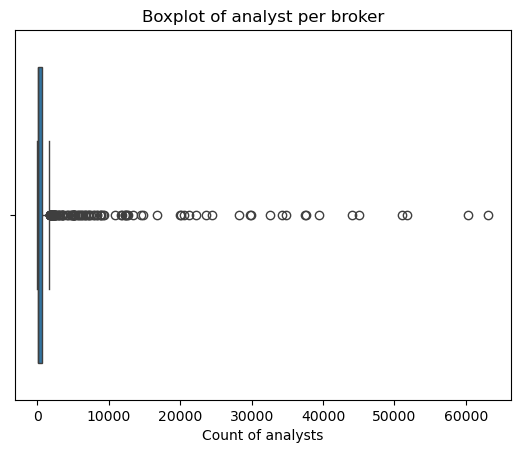

count      671.000000
mean      2049.554396
std       6881.741629
min          1.000000
25%         16.000000
50%         92.000000
75%        699.500000
max      63137.000000
Name: count, dtype: float64


In [8]:
# boxplot of analyst per broker
sns.boxplot(x=df['estimator'].value_counts())
plt.title('Boxplot of analyst per broker')
plt.xlabel('Count of analysts')
plt.show()
print(df['estimator'].value_counts().describe())

## Analysts

In [9]:
# number of disinct analysts
analysts = df['analyst'].nunique()
analysts

10237

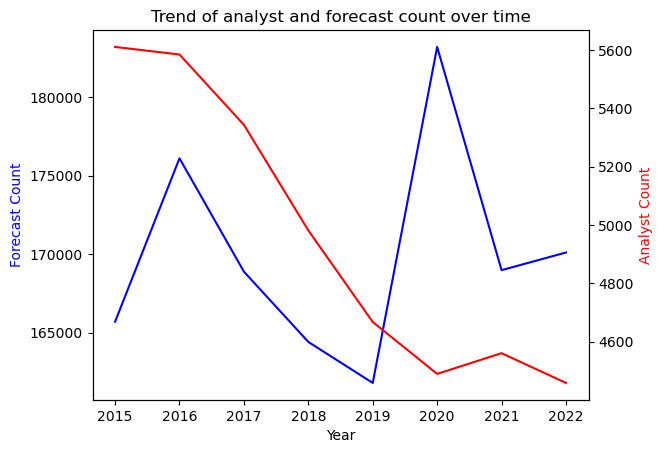

In [23]:
df['fiscal_period_ending'] = pd.to_datetime(df['fiscal_period_ending'])
df['announce_year'] = df['fiscal_period_ending'].dt.year 
df = df[(df['announce_year'] >= 2014) & (df['announce_year'] <= 2022)]

# sum of forecasts over all analyst per year
forecast_count = df.groupby('announce_year')['analyst'].count()
analyst_count = df.groupby('announce_year')['analyst'].nunique()

fig, ax1 = plt.subplots()
ax1.plot(forecast_count.index, forecast_count.values, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Forecast Count', color='blue')

# Create a second axis
ax2 = ax1.twinx()

# Plot the analyst count on the second axis
ax2.plot(analyst_count.index, analyst_count.values, color='red')
ax2.set_ylabel('Analyst Count', color='red')

plt.title('Trend of analyst and forecast count over time')
plt.show()


# Coverage